In [ ]:
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.tokenize import TreebankWordTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier # need to import xboost calssifer

warnings.filterwarnings('ignore')
np.random.seed(0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [ ]:
df_train.shape

(7168, 8)

In [ ]:
df_train.head(2)

,label,statement,subject,speaker,speakers job title,state info,party affiliation,id
0,false,The Iranians continue in the view of every obj...,foreign-policy,john-mccain,U.S. senator,Arizona,republican,0
1,mostly-true,The city of Columbus would save $41 million a ...,"jobs,labor,unions",dave-yost,Ohio auditor,ohio,republican,1


In [ ]:
df_test.shape

(3072, 7)

Text(0.5, 1.0, 'Frequency of different classes in the dataset')

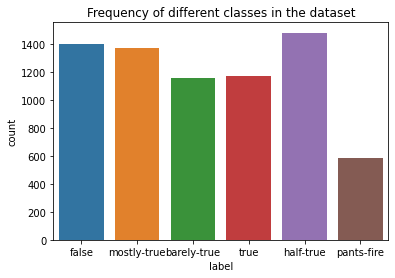

In [ ]:
sns.countplot(x='label',data=df_train)
plt.title('Frequency of different classes in the dataset')

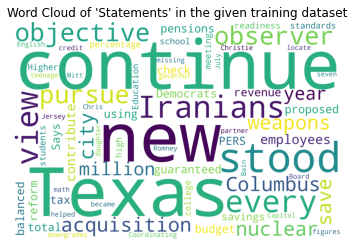

In [ ]:
text = df_train['statement'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Statements' in the given training dataset")
plt.show()

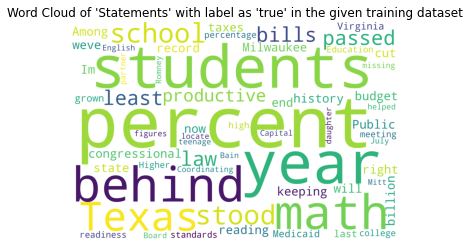

In [ ]:
text = df_train[df_train['label'] == 'true']['statement'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Statements' with label as \'true\' in the given training dataset")
plt.show()

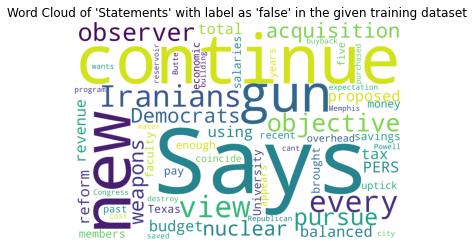

In [ ]:
text = df_train[df_train['label'] == 'false']['statement'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Statements' with label as \'false\' in the given training dataset")
plt.show()

In [ ]:
labels_dict = {'mostly-true':4,'barely-true':2,'half-true':3,'false':1, 'true':5,'pants-fire':0}
df_train['label'] = df_train['label'].apply(lambda x: labels_dict[x])

In [ ]:
def preprocess(text):
  text = text.lower() # lower - casing the text
  text = re.sub('<[^>]*>', ' ', text)
  text = re.sub('[\W]+', ' ', text)
  tokenizer = TreebankWordTokenizer()
  words = tokenizer.tokenize(text)
  text = ' '.join(words)
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] # removal of stopwords
  text = ' '.join(filtered_sentence)
  ps = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  stemming = []
  lemmit = []
  for word in text.split():
    stemming.append(ps.stem(word))
  for word in stemming:
    lemmit.append(lemmatizer.lemmatize(word))
  text = ' '.join(lemmit)
  return text

In [ ]:
df_train['statement'] = df_train['statement'].apply(preprocess)
df_test['statement'] = df_test['statement'].apply(preprocess)

In [ ]:
X= df_train['statement']
y=df_train['label']
X_test = df_test['statement']

In [ ]:
def Tokenizer(str_input):
  words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
  porter_stemmer=nltk.PorterStemmer()
  words = [porter_stemmer.stem(word) for word in words]
  return words
  
stopwords_list = stopwords.words('english')

In [ ]:
model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char_wb',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list, ngram_range=(1,3))),
    ('norm', Binarizer()),
    ('clf', MultinomialNB()),
])

In [ ]:
model.fit(X, y)
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[4 3 2 ... 3 2 4]


In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [236 652 444 629 654 457]


In [ ]:
id = []
for i in range(len(predictions)):
  id.append(i)

In [ ]:
final_df = pd.DataFrame({'id' : id, 'label' : predictions})

In [ ]:
final_df

,id,label
0,0,4
1,1,3
2,2,2
3,3,4
4,4,3
...,...,...
3067,3067,5
3068,3068,1
3069,3069,3
3070,3070,2


In [ ]:
final_df.to_csv('output.csv', index = False)